In [6]:
import pandas as pd

data = pd.read_csv("postings.csv")
data = data.dropna()
data.drop_duplicates(subset=["Posting"], inplace=True)
data = data.sample(frac=1)
display(data)


,Posting,Label
282,det går bra för oss för att möta våra kunders ...,Good
45,domstolsakademin söker nu en eller flera hovrä...,Bad
426,meet a student är en jobbplattform för student...,Good
319,meet a student är en jobbplattform för student...,Good
421,professionals nord söker i samarbete med kund ...,Good
...,...,...
108,dragon port är baserade i mölnlycke och har di...,Bad
103,vi söker driven och social tekniker till att v...,Bad
286,vi söker nu en medarbetare med erfarenhet av s...,Good
122,ouazzani invest ab sysslar med bemanning inom ...,Bad


Naive Bayes Accuracy: 0.6732673267326733
Random Forest Accuracy: 0.7524752475247525


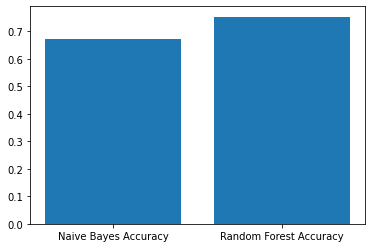

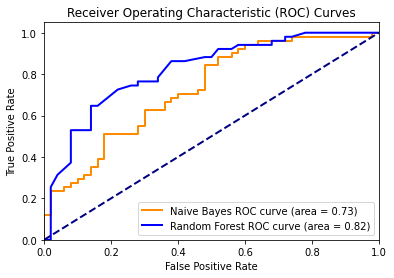

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

x = data["Posting"]
y = data["Label"]

# Convert labels to binary values (0 and 1)
y_binary = [1 if label == 'Good' else 0 for label in y]

x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, shuffle=False)

tfid_converter = TfidfVectorizer(max_features=10)

x_train_tfid = tfid_converter.fit_transform(x_train).toarray()
x_train_tfid_df = pd.DataFrame(x_train_tfid)

x_test_tfid = tfid_converter.transform(x_test).toarray()
x_test_tfid_df = pd.DataFrame(x_test_tfid)

nb_model = GaussianNB()
nb_model.fit(x_train_tfid_df, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_tfid_df, y_train)

y_pred_nb = nb_model.predict(x_test_tfid_df)
y_pred_rf = rf_model.predict(x_test_tfid_df)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


print("Naive Bayes Accuracy:", accuracy_nb)
print("Random Forest Accuracy:", accuracy_rf)

y_pred_prob_nb = nb_model.predict_proba(x_test_tfid_df)[:, 1]
y_pred_prob_rf = rf_model.predict_proba(x_test_tfid_df)[:, 1]

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot accuracy for both models
plt_labels = ["Naive Bayes Accuracy", "Random Forest Accuracy"] 
plt.bar(plt_labels, [accuracy_nb, accuracy_rf])

# Plot ROC curves for both models
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()